In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [159]:
data=pd.read_csv('ILPD.csv',names = ['Age','Gender','TB','DB','ALP','ALT','AST','TP','ALB','A/G Ratio','class'])
data.head()

,Age,Gender,TB,DB,ALP,ALT,AST,TP,ALB,A/G Ratio,class
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [13]:
print('Number of rows and columns:',data.shape)

Number of rows and columns: (583, 11)


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age          583 non-null int64
Gender       583 non-null object
TB           583 non-null float64
DB           583 non-null float64
ALP          583 non-null int64
ALT          583 non-null int64
AST          583 non-null int64
TP           583 non-null float64
ALB          583 non-null float64
A/G Ratio    579 non-null float64
class        583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


Out of 11 variables there are 9 continuous features and 2 categorical feature.

continuous features:
* Age
* TB (Total Bilirubin)
* DB (Direct Bilirubin)
* ALP (Alkphos Alkaline Phosphotase)
* ALT (Sgpt Alamine Aminotransferase)
* AST (Sgot Aspartate Aminotransferase)
* TP (Total Protiens)
* ALB (Albumin)
* A/G Ratio (Albumin and Globulin Ratio)

categorical features:
* Gender (Male/Female)
* class (liver patient-2 or not-1)



In [16]:
data.describe(include = 'all')

,Age,Gender,TB,DB,ALP,ALT,AST,TP,ALB,A/G Ratio,class
count,583.000000,583,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,44.746141,NaN,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,NaN,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,NaN,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,NaN,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,NaN,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,NaN,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000


- Age in dataset is between 4 and 90 with average age being ~44
- There is a possibilty of outliers in TB, DB, ALP, ALT, AST as there a lot of difference between quantile 3 values are there mean values.

##### categorical variables :

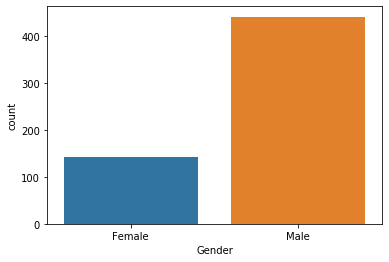

In [136]:
sns.countplot(data['Gender'])
plt.show()

In [21]:
print(data.Gender.value_counts(normalize = True)*100)

Male      75.643225
Female    24.356775
Name: Gender, dtype: float64


There are two categories Male and Female in Gender feature and 75.64% observations are male and only 24.35% obseravtion are of female.

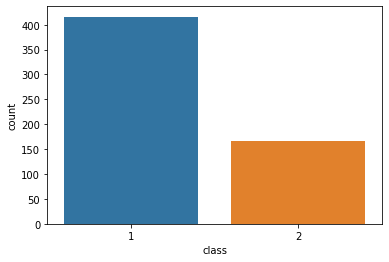

In [24]:
sns.countplot(data['class'])
plt.show()

In [137]:
print(data['class'].value_counts(normalize = True)*100)

1    71.35506
2    28.64494
Name: class, dtype: float64


The data consists of 28.64% of liver patient records and 71.355% are non liver patient records.

In [28]:
# let's visualise the percentage of missing values
for var in data.columns:
    if data[var].isnull().sum()>0:
        print(var,'_', round((data[var].isnull().mean())*100,2),'%')

A/G Ratio _ 0.69 %


The data has only 0.69% of missing values in only one column(A/G Ratio). As it is very less
we can drop the rows with missing values.

In [160]:
data = data.dropna()

In [161]:
data.shape

(579, 11)

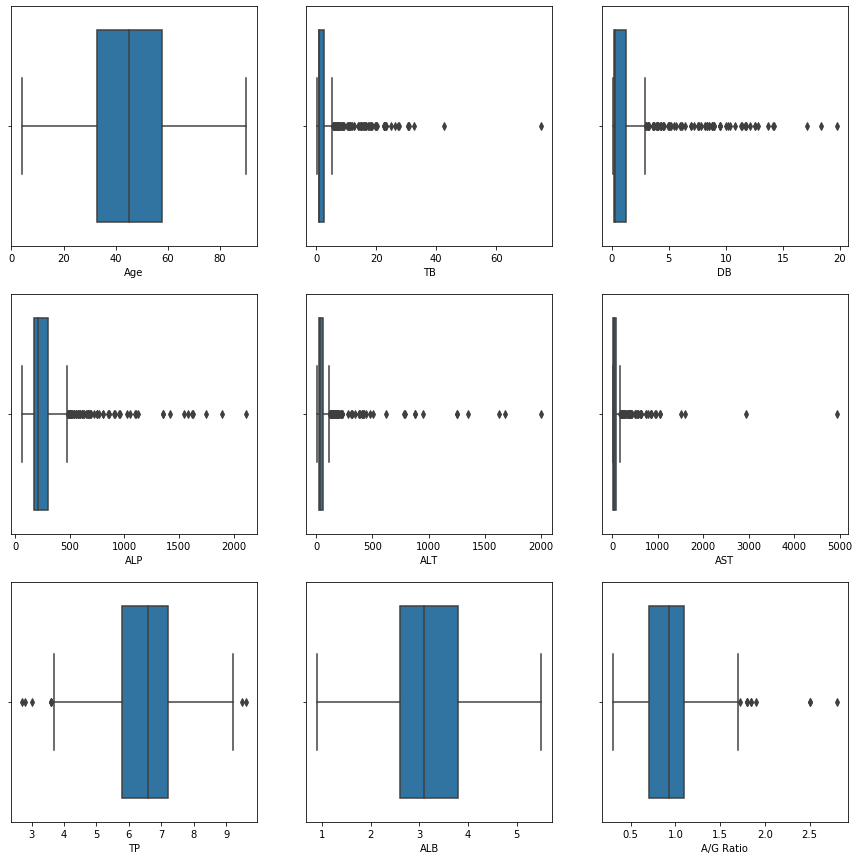

In [38]:
# boxplots to visualise outliers in the continuous variables

fig,ax = plt.subplots(3,3,figsize=(15,15))
ax = ax.flatten()
for i, column in enumerate(['Age', 'TB', 'DB', 'ALP', 'ALT', 'AST', 'TP', 'ALB','A/G Ratio']):
    sns.boxplot(column, data=data, ax=ax[i])

plt.show()

In most of the continuous variables outliers are present except in age and ALB.

##### Target variable:

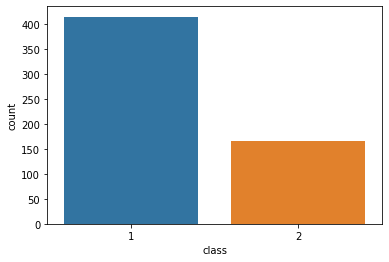

In [39]:
sns.countplot(data['class'])
plt.show()

We can see that the target variable consists of 28.64% of observations which are of liver patients and 71.355% are of not liver patients. It will cause biasness in the data. we may use sampling techniques to rectify this problem.

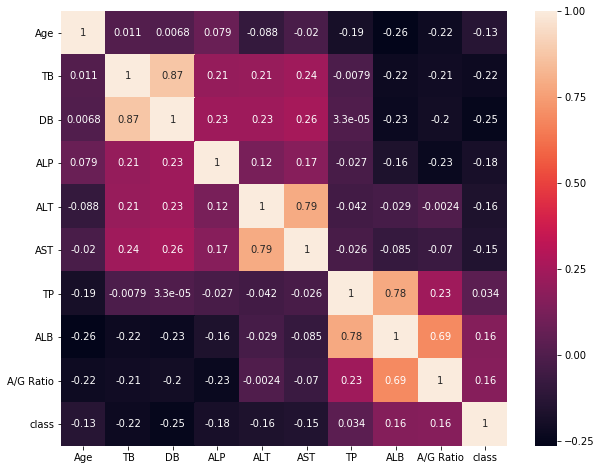

In [47]:
fig,ax = plt.subplots(1,1,figsize=(10,8))
sns.heatmap(data.corr(),annot=True)

* TB Total Bilirubin and DB Direct Bilirubin are highest positive correlated featues in the data.
* Sgpt Alamine Aminotransferase(ALT) and Sgot Aspartate Aminotransferase(AST) also show strong positive correlation(0.79) and ALB Albumin has positive correlation with TP(0.78) and A/G Ratio(0.69) 
* But we can see that there is no strong correlation between  target variable(class) and other independent variables.

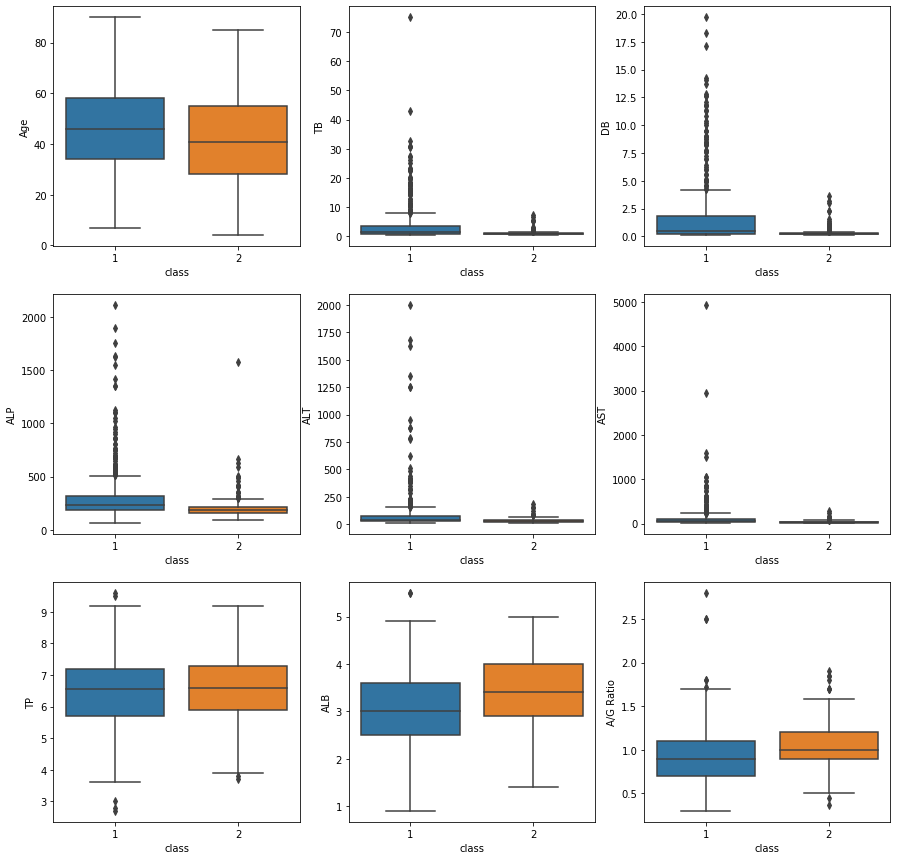

In [43]:
#continuous variables with the target variable.
fig,ax = plt.subplots(3,3,figsize=(15,15))
ax = ax.flatten()
for i, column in enumerate(['Age', 'TB', 'DB', 'ALP', 'ALT', 'AST', 'TP', 'ALB','A/G Ratio']):
    sns.boxplot(y=column, x= 'class', data=data, ax=ax[i])

plt.show()

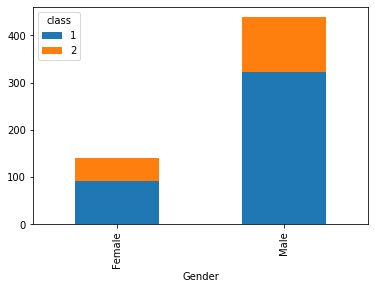

In [141]:
#categorical variables with the target variable.
pd.crosstab(data['Gender'],data['class']).plot.bar(stacked=True)
plt.show()

We can see that the target variable consists of 28.64% of observations which are of liver patients and 71.355% are of not liver patients. It will cause biasness in the data. we may use sampling techniques to rectify this problem.

As the gender variable is of type object, we can convert it to numerical by creating dummy varibles using get_dummies or by replacing the values with 0 and 1. The target column consists of values 1 and 2, so we replace 1 with 0 and 2 with 1.

In [162]:
data['Gender'] = data['Gender'].replace({'Male':0,'Female':1})
data['class'] = data['class'].replace({2:1,1:0})

In [163]:
data.head()

,Age,Gender,TB,DB,ALP,ALT,AST,TP,ALB,A/G Ratio,class
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,0
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,0
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,0
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,0
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,0


In [164]:
#separating our features and target variable.
X = data.drop(['class'],axis=1)
y = data['class']

In [165]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(405, 10)
(174, 10)
(405,)
(174,)


**Base model** :

Considering Logistic Regression as base model, as the target variable is bi-class variable i.e, either liver patient or not.

In [166]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score

lr=LogisticRegression(solver='liblinear')

lr.fit(X_train,y_train)

print('Training score =', lr.score(X_train, y_train))
print('Test score =', lr.score(X_test, y_test))

Training score = 0.6987654320987654
Test score = 0.7471264367816092


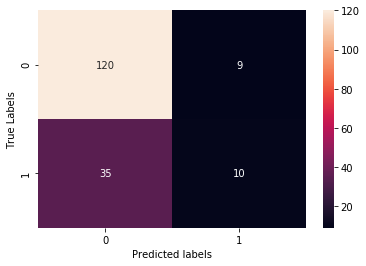

Accuracy = 0.7471264367816092
Precision = 0.5263157894736842
Recall = 0.2222222222222222
F1 Score = 0.3125


In [167]:
y_pred = lr.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='d')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True Labels')
plt.show()

tn = cm[0,0]
tp = cm[1,1]
fp = cm[0,1]
fn = cm[1,0]

accuracy = (tp+tn)/(tp+fn+fp+tn)
precision = tp / (tp+fp)
recall = tp / (tp+fn)
f1 = 2*precision*recall / (precision+recall)

print('Accuracy =',accuracy)
print('Precision =', precision)
print('Recall =', recall)
print('F1 Score =', f1)


The overall accuracy of the model is 74.71% which is not a desirable accuracy as we are dealing with predicting the liver patients.


Since our goal here is to predict liver patients, we will be more conerned about increasing our True Positives and decreasing our false negatives since It is undesirable if we predict someone who is actually having liver issues as not a liver patient.


Other important key model output parameter is ROC AUC:

ROC AUC = 0.770714900947459


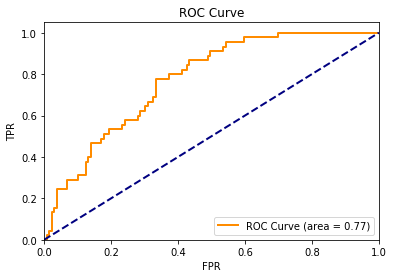

In [89]:
from sklearn.metrics import roc_curve,roc_auc_score
yprob = lr_model.predict_proba(X_test)
fpr,tpr,threshold = roc_curve(y_test,yprob[:,1])
roc_auc = roc_auc_score(y_test,yprob[:,1])

print('ROC AUC =', roc_auc)
plt.figure()
lw = 2
plt.plot(fpr,tpr,color='darkorange',lw=lw,label='ROC Curve (area = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [170]:
lr_acc = accuracy
lr_recall = recall
lr_f1 = f1
lr_auc = roc_auc

In [146]:
import statsmodels.api as sm
Xc=sm.add_constant(X)
logit_model=sm.Logit(y,Xc)
result=logit_model.fit(maxiter=1000)
(result.summary())

Optimization terminated successfully.
         Current function value: 0.490445
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  class   No. Observations:                  579
Model:                          Logit   Df Residuals:                      568
Method:                           MLE   Df Model:                           10
Date:                Tue, 03 Dec 2019   Pseudo R-squ.:                  0.1793
Time:                        13:27:23   Log-Likelihood:                -283.97
converged:                       True   LL-Null:                       -346.00
Covariance Type:            nonrobust   LLR p-value:                 7.525e-22
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5737      1.333      2.681      0.007       0.961       6.186
Age           -0.0183      0.006     -2.868      0.004      -0.031      -0.006
Gender         0.0310      0.233      0.133      0.894      -0.425       0.487
TB            -0.0112      0.087     -0.129      0.897      -0.182       0.159
DB            -0.4497      0.241     -1.862      0.063      -0.923       0.024
ALP           -0.0013      0.001     -1.572      0.116      -0.003       0.000
ALT           -0.0119      0.005     -2.339      0.019      -0.022      -0.002
AST           -0.0025      0.003     -0.793      0.428      -0.009       0.004
TP            -0.9274      0.381     -2.431      0.015      -1.675      -0.180
ALB            1.6951      0.748      2.266      0.023       0.229       3.161
A/G Ratio     -1.8081      1.141     -1.585      0.113      -4.044       0.428
==============================================================================
"""

Age, ALT, TP and ALB are the significant variables at 5% level of significance as there p-value is less than 0.05.

In [168]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaledXtrain=sc.fit_transform(X_train)
scaledXtest=sc.transform(X_test)

In [148]:
def evaluate_model(model, X, y):
    from sklearn.metrics import confusion_matrix, classification_report
    
    ypred = model.predict(X)
    cm = confusion_matrix(y, ypred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.show()
    
    tn = cm[0,0]
    tp = cm[1,1]
    fp = cm[0,1]
    fn = cm[1,0]

    accuracy = (tp+tn)/(tp+fn+fp+tn)
    precision = tp / (tp+fp)
    recall = tp / (tp+fn)
    f1 = 2*precision*recall / (precision+recall)

    print('Accuracy =',accuracy)
    print('Precision =', precision)
    print('Recall =', recall)
    print('F1 Score =', f1)
    print()
    
    from sklearn.metrics import roc_curve,roc_auc_score
    yprob = model.predict_proba(X)
    fpr,tpr,threshold = roc_curve(y,yprob[:,1])
    roc_auc = roc_auc_score(y,yprob[:,1])

    print('ROC AUC =', roc_auc)
    plt.figure()
    lw = 2
    plt.plot(fpr,tpr,color='darkorange',lw=lw,label='ROC Curve (area = %0.2f)'%roc_auc)
    plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()
    
    return accuracy, recall, f1, roc_auc

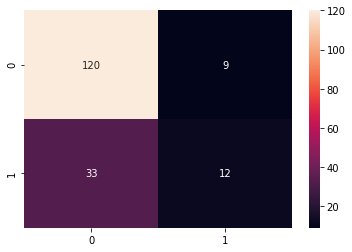

Accuracy = 0.7586206896551724
Precision = 0.5714285714285714
Recall = 0.26666666666666666
F1 Score = 0.36363636363636365

ROC AUC = 0.732644272179156


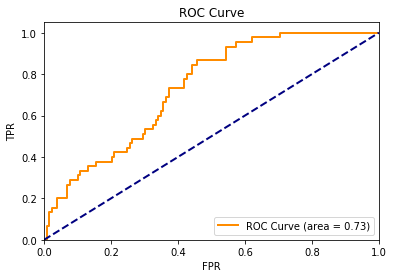

In [169]:
lr=LogisticRegression(solver='liblinear')

lr.fit(scaledXtrain,y_train)
lrs_acc, lrs_recall, lrs_f1, lrs_auc = evaluate_model(lr,scaledXtest, y_test)

By scaling the data overall accuracy increased from 74.71% to 75.86% and there is also slight increase in recall and F1-score.

AS there is a slight imbalance in the data. Applying SMOTE to see if this improves our results.

(405, 10)
(570, 10)


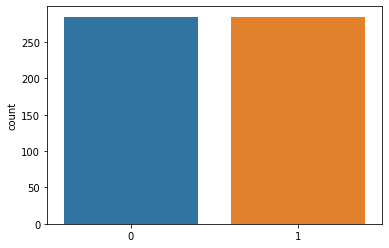

In [97]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

X_resampled, y_resampled = sm.fit_sample(X_train, y_train)

X_resampled = pd.DataFrame(X_resampled, columns=X_train.columns)

print(X_train.shape)
print(X_resampled.shape)

sns.countplot(y_resampled)
plt.show()

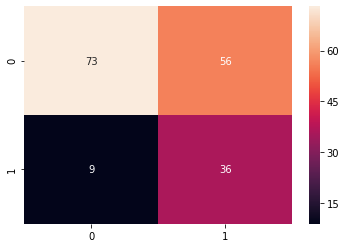

Accuracy = 0.6264367816091954
Precision = 0.391304347826087
Recall = 0.8
F1 Score = 0.5255474452554745

ROC AUC = 0.7619293712316968


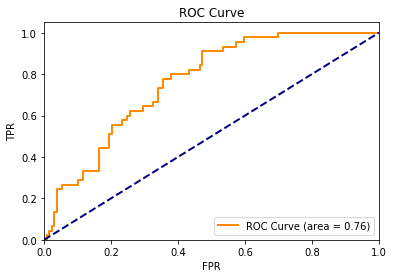

In [99]:
lr=LogisticRegression(solver='liblinear')

lr.fit(X_resampled,y_resampled)
lr_acc, lr_recall, lr_f1, lr_auc = evaluate_model(lr,X_test, y_test)

Applying the SMOTE is not working to improve the overall accuracy.

Feature Selection using Backward elimination:

In [115]:
import statsmodels.api as sm
Xc=sm.add_constant(X)
logit_model=sm.Logit(y,Xc)
result=logit_model.fit(maxiter=1000)
(result.summary())

Optimization terminated successfully.
         Current function value: 0.490445
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  class   No. Observations:                  579
Model:                          Logit   Df Residuals:                      568
Method:                           MLE   Df Model:                           10
Date:                Tue, 03 Dec 2019   Pseudo R-squ.:                  0.1793
Time:                        12:50:19   Log-Likelihood:                -283.97
converged:                       True   LL-Null:                       -346.00
Covariance Type:            nonrobust   LLR p-value:                 7.525e-22
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5737      1.333      2.681      0.007       0.961       6.186
Age           -0.0183      0.006     -2.868      0.004      -0.031      -0.006
Gender         0.0310      0.233      0.133      0.894      -0.425       0.487
TB            -0.0112      0.087     -0.129      0.897      -0.182       0.159
DB            -0.4497      0.241     -1.862      0.063      -0.923       0.024
ALP           -0.0013      0.001     -1.572      0.116      -0.003       0.000
ALT           -0.0119      0.005     -2.339      0.019      -0.022      -0.002
AST           -0.0025      0.003     -0.793      0.428      -0.009       0.004
TP            -0.9274      0.381     -2.431      0.015      -1.675      -0.180
ALB            1.6951      0.748      2.266      0.023       0.229       3.161
A/G Ratio     -1.8081      1.141     -1.585      0.113      -4.044       0.428
==============================================================================
"""

In [117]:
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['Age', 'DB', 'ALP', 'ALT', 'TP', 'ALB']


Final set of variables which are 'Age', 'DB', 'ALP', 'ALT', 'TP', and 'ALB'

In [151]:
#separating our features and target variable.
X = data[['Age', 'DB', 'ALP', 'ALT', 'TP', 'ALB']]
y = data['class']

In [152]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [153]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaledXtrain=sc.fit_transform(X_train)
scaledXtest=sc.transform(X_test)

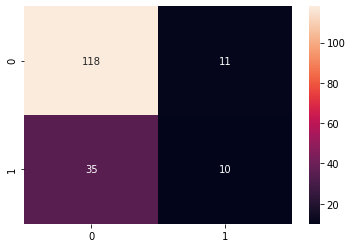

Accuracy = 0.735632183908046
Precision = 0.47619047619047616
Recall = 0.2222222222222222
F1 Score = 0.30303030303030304

ROC AUC = 0.7560723514211886


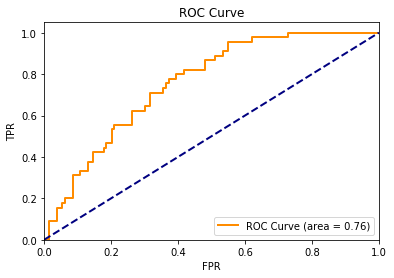

In [154]:
lr=LogisticRegression(solver='liblinear')

lr.fit(scaledXtrain,y_train)
lrf_acc, lrf_recall, lrf_f1, lrf_auc = evaluate_model(lr,scaledXtest, y_test)

With Backward Elimination also overall accuracy is not increasing.

In [155]:
X = data.drop(['class'],axis=1)
y = data['class']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaledXtrain=sc.fit_transform(X_train)
scaledXtest=sc.transform(X_test)

#### Decision Tree

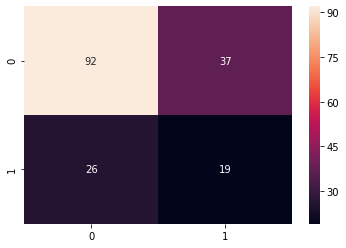

Accuracy = 0.6379310344827587
Precision = 0.3392857142857143
Recall = 0.4222222222222222
F1 Score = 0.3762376237623763

ROC AUC = 0.5677002583979328


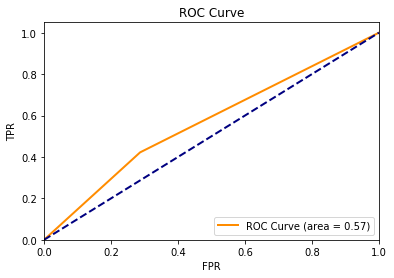

In [156]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(scaledXtrain, y_train)
dt_acc, dt_recall, dt_f1, dt_auc = evaluate_model(dt, scaledXtest, y_test)

 #### knn

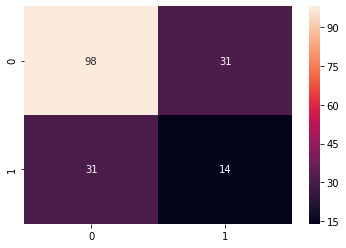

Accuracy = 0.6436781609195402
Precision = 0.3111111111111111
Recall = 0.3111111111111111
F1 Score = 0.3111111111111111

ROC AUC = 0.6140396210163652


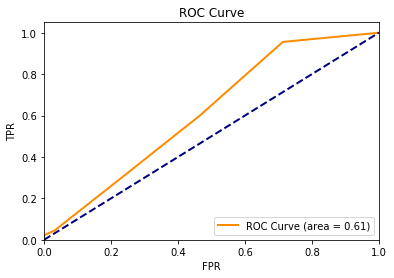

In [124]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(scaledXtrain, y_train)
knn_acc, knn_recall, knn_f1, knn_auc = evaluate_model(knn, scaledXtest, y_test)

#### Naive Bayes

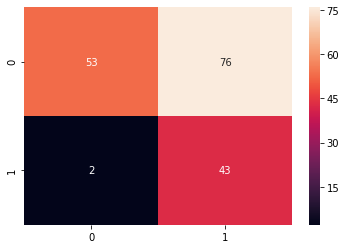

Accuracy = 0.5517241379310345
Precision = 0.36134453781512604
Recall = 0.9555555555555556
F1 Score = 0.524390243902439

ROC AUC = 0.7469422911283377


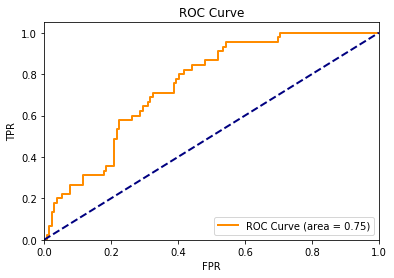

In [125]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(scaledXtrain, y_train)
nb_acc, nb_recall, nb_f1, nb_auc = evaluate_model(nb, scaledXtest, y_test)

#### Ensemble Techniques:

#### Random Forest

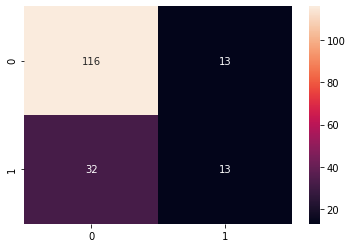

Accuracy = 0.7413793103448276
Precision = 0.5
Recall = 0.28888888888888886
F1 Score = 0.3661971830985915

ROC AUC = 0.7143841515934539


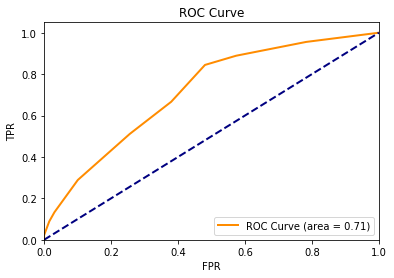

In [128]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(scaledXtrain, y_train)
rf_acc, rf_recall, rf_f1, rf_auc = evaluate_model(rf, scaledXtest, y_test)

In [130]:
from sklearn.model_selection import GridSearchCV
param_grid = {'criterion': ['gini','entropy'],
              'max_depth': [None,5,10,15],
              'max_features': [None,2,4]}

rf = RandomForestClassifier(n_estimators=200)
rf_grid = GridSearchCV(rf, param_grid, cv=5, scoring='f1')
rf_grid.fit(scaledXtrain, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=200, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

In [131]:
rf_grid.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'max_features': None}

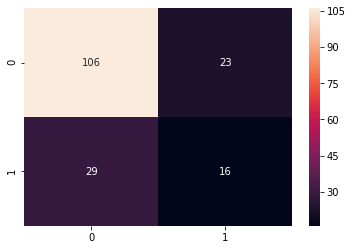

Accuracy = 0.7011494252873564
Precision = 0.41025641025641024
Recall = 0.35555555555555557
F1 Score = 0.38095238095238093

ROC AUC = 0.7278208440999139


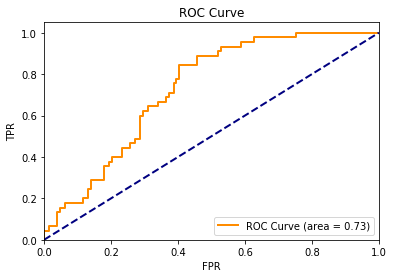

In [132]:
rf_best = rf_grid.best_estimator_
rf2_acc, rf2_recall, rf2_f1, rf2_auc = evaluate_model(rf_best, scaledXtest, y_test)

#### Gradient Boosting

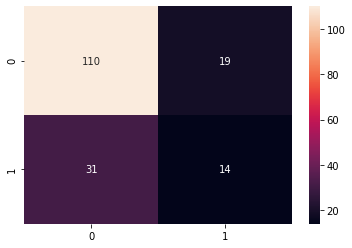

Accuracy = 0.7126436781609196
Precision = 0.42424242424242425
Recall = 0.3111111111111111
F1 Score = 0.3589743589743589

ROC AUC = 0.7028423772609819


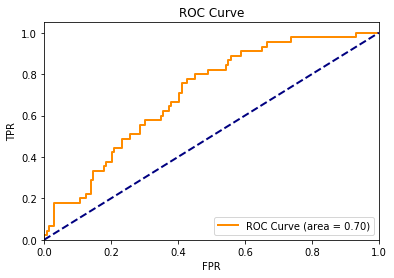

In [133]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(scaledXtrain, y_train)
gb_acc, gb_recall, gb_f1, gb_auc = evaluate_model(gb, scaledXtest, y_test)

#### Question 10

In [171]:
pd.DataFrame({'Model': ['Logistic Regression without scaling the features','Logistic Regression with selected features','Logistic Regression ', 'Decision Trees', 'KNN', 'Naive Bayes', 'Random Forest', 'Random Forest with Grid Search', 'Gradient Boosting'],
              'Accuracy': [lr_acc,lrf_acc,lrs_acc, dt_acc, knn_acc, nb_acc, rf_acc, rf2_acc, gb_acc],
              'Recall': [lr_recall,lrf_recall,lrs_recall, dt_recall, knn_recall, nb_recall, rf_recall, rf2_recall, gb_recall],
              'F1 Score': [lr_f1,lrf_f1,lrs_f1, dt_f1, knn_f1, nb_f1, rf_f1, rf2_f1, gb_f1],
              'ROC AUC': [lr_auc,lrf_auc,lrs_auc, dt_auc, knn_auc, nb_auc, rf_auc, rf2_auc, gb_auc]})

,Model,Accuracy,Recall,F1 Score,ROC AUC
0,Logistic Regression without scaling the features,0.747126,0.222222,0.312500,0.720413
1,Logistic Regression with selected features,0.735632,0.222222,0.303030,0.756072
2,Logistic Regression,0.758621,0.266667,0.363636,0.732644
3,Decision Trees,0.637931,0.422222,0.376238,0.567700
4,KNN,0.643678,0.311111,0.311111,0.614040
5,Naive Bayes,0.551724,0.955556,0.524390,0.746942
6,Random Forest,0.741379,0.288889,0.366197,0.714384
7,Random Forest with Grid Search,0.701149,0.355556,0.380952,0.727821
8,Gradient Boosting,0.712644,0.311111,0.358974,0.702842


* Logistic Regression with selected features has very low Recall and F1 Scores
* Naive Bayes has Recall and F1 Score but the overall accuracy is very low.
* By scaling the the features accuracy increased.

Logistic Regression is the best model.
